In [2]:
## Importing Required Libraries

import csv
import heapq
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

#Warehouses Shape and Racks



```
This code creates warehouses with all racks.
It creates CSV files of the cell's coordinates,  
and racks coordinate in order to use it for the next step which is the distance matrix.
```



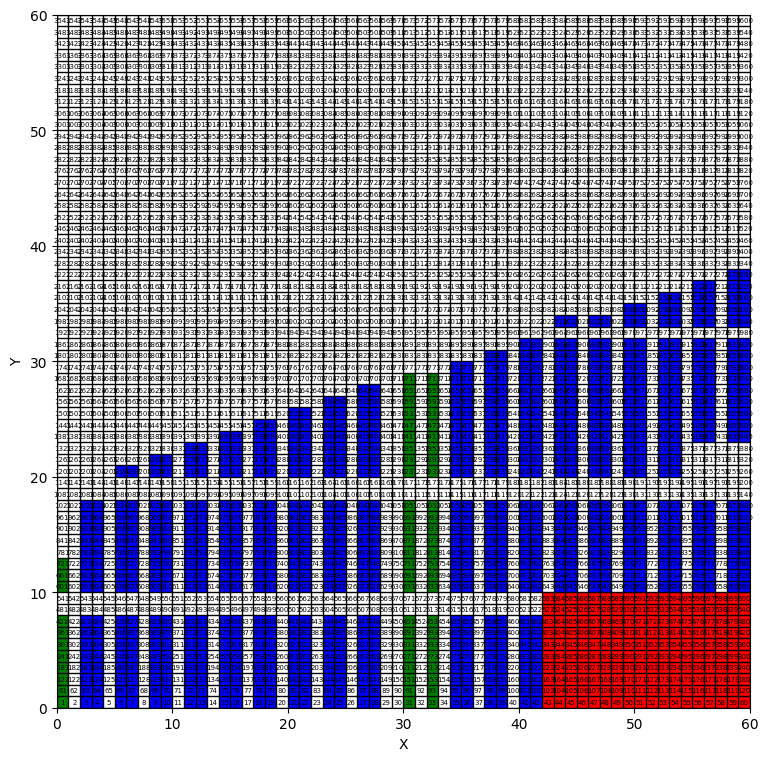

In [1]:
# - Grid Visualization-


## Define the Cell Class

class Cell:
    """
    Represents a cell in the grid.
    """

    def __init__(self, row, col, cell_number):
        self.row = row
        self.col = col
        self.cell_number = cell_number


## Grid Generation Functions

def generate_grid(width, height, cell_size):
    """
    Generates a grid of cells.

    Parameters:
    - width: The width of the grid in units.
    - height: The height of the grid in units.
    - cell_size: The size of each grid cell in units.

    Returns:
    - The generated grid as a 2D list of Cell objects.
    """
    num_cols = width // cell_size
    num_rows = height // cell_size
    grid = [[Cell(j, i, j * num_cols + i + 1) for i in range(num_cols)] for j in range(num_rows)]
    return grid

def save_grid_to_csv(grid, cell_size):
    """
    Saves the grid coordinates to a CSV file.

    Parameters:
    - grid: The grid as a 2D list of Cell objects.
    - cell_size: The size of each grid cell in units.
    """
    num_cols = len(grid[0])
    num_rows = len(grid)

    with open('grid_coordinates.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Cell Number', 'X', 'Y'])

        for row in range(num_rows):
            for col in range(num_cols):
                x = col * cell_size
                y = row * cell_size
                cell_number = grid[row][col].cell_number
                writer.writerow([cell_number, x, y])

## Grid Plotting Function

def plot_grid(width, height, cell_size):
    """
    Plots the grid with various rectangles representing different regions.

    Parameters:
    - width: The width of the grid in units.
    - height: The height of the grid in units.
    - cell_size: The size of each grid cell in units.
    """
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.set_aspect('equal')

    # Plot grid lines
    for x in range(0, width + 1, cell_size):
        ax.axvline(x, color='black', linewidth=1)

    for y in range(0, height + 1, cell_size):
        ax.axhline(y, color='black', linewidth=1)

    # Calculate the number of cells in each direction
    num_cells_x = width // cell_size
    num_cells_y = height // cell_size

    def add_rectangle(x, y, height, color):
        rect = patches.Rectangle((x, y), cell_size, height, facecolor=color)
        ax.add_patch(rect)

    def add_rectangles(rectangles, color):
        for rect_coords in rectangles:
            add_rectangle(rect_coords[0], rect_coords[1], rect_coords[2], color)

    single_warehouse_rectangles = [
        (0, 0, 8 * cell_size),
        (0, 10, 3 * cell_size),
          (30, 0, 8 * cell_size),
        (30, 10, 8 * cell_size),
        (32, 0, 8 * cell_size),
        (32, 10, 8 * cell_size),
        (30, 20, 9 * cell_size),
        (32, 20, 9 * cell_size)
    ]

    double_warehouse_rectangles = [(2, 0, 8 * cell_size),(2, 10, 8 * cell_size),(3, 0, 8 * cell_size),
      (3, 10, 8 * cell_size),(5, 0, 8 * cell_size),(5, 10, 8 * cell_size),(6, 0, 8 * cell_size),
      (6, 10, 8 * cell_size),(5, 20, 1 * cell_size),(6, 20, 1 * cell_size),(8, 0, 8 * cell_size),
      (8, 10, 8 * cell_size),(9, 0, 8 * cell_size),(9, 10, 8 * cell_size),(8, 20, 2 * cell_size),
      (9, 20, 2 * cell_size),(11, 0, 8 * cell_size),(11, 10, 8 * cell_size),(12, 0, 8 * cell_size),
      (12, 10, 8 * cell_size),(11, 20, 3 * cell_size),(12, 20, 3 * cell_size),(14, 0, 8 * cell_size),
      (14, 10, 8 * cell_size),(15, 0, 8 * cell_size),(15, 10, 8 * cell_size),(14, 20, 4 * cell_size),
      (15, 20, 4 * cell_size),(17, 0, 8 * cell_size),(17, 10, 8 * cell_size),(18, 0, 8 * cell_size),
      (18, 10, 8 * cell_size),(17, 20, 5 * cell_size),(18, 20, 5 * cell_size),(20, 0, 8 * cell_size),
      (20, 10, 8 * cell_size),(21, 0, 8 * cell_size),(21, 10, 8 * cell_size),(20, 20, 6 * cell_size),
      (21, 20, 6 * cell_size),(23, 0, 8 * cell_size),(23, 10, 8 * cell_size),(24, 0, 8 * cell_size),
      (24, 10, 8 * cell_size),(23, 20, 7 * cell_size),(24, 20, 7 * cell_size),(26, 0, 8 * cell_size),
      (26, 10, 8 * cell_size),(27, 0, 8 * cell_size),(27, 10, 8 * cell_size),(26, 20, 8 * cell_size),
      (27, 20, 8 * cell_size),(34, 0, 8 * cell_size),(34, 10, 8 * cell_size),(35, 0, 8 * cell_size),
      (35, 10, 8 * cell_size),(34, 20, 10 * cell_size),(35, 20, 10 * cell_size),(37, 0, 8 * cell_size),
      (37, 10, 8 * cell_size),(38, 0, 8 * cell_size),(38, 10, 8 * cell_size),(37, 20, 11 * cell_size),
      (38, 20, 11 * cell_size),(40, 0, 8 * cell_size),(40, 10, 8 * cell_size),
        (41, 0, 8 * cell_size),
        (41, 10, 8 * cell_size),
        (40, 20, 12 * cell_size),
        (41, 20, 12 * cell_size),
        (43, 10, 8 * cell_size),
        (44, 10, 8 * cell_size),
        (43, 20, 12 * cell_size),
        (44, 20, 12 * cell_size),
        (43, 33, 1 * cell_size),
        (44, 33, 1 * cell_size),
        (46, 10, 8 * cell_size),
        (47, 10, 8 * cell_size),
        (46, 20, 12 * cell_size),
        (47, 20, 12 * cell_size),
        (46, 33, 1 * cell_size),
        (47, 33, 1 * cell_size),
        (49, 10, 8 * cell_size),
        (50, 10, 8 * cell_size),
        (49, 20, 12 * cell_size),
        (50, 20, 12 * cell_size),
        (49, 33, 2 * cell_size),
        (50, 33, 2 * cell_size),
        (52, 10, 8 * cell_size),
        (53, 10, 8 * cell_size),
        (52, 20, 12 * cell_size),
        (53, 20, 12 * cell_size),
        (52, 33, 3 * cell_size),
        (53, 33, 3 * cell_size),
        (55, 10, 8 * cell_size),
        (56, 10, 8 * cell_size),
        (55, 23, 9 * cell_size),
        (56, 23, 9 * cell_size),
        (55, 33, 4 * cell_size),
        (56, 33, 4 * cell_size),
        (58, 10, 8 * cell_size),
        (59, 10, 8 * cell_size),
        (58, 23, 9 * cell_size),
        (59, 23, 9 * cell_size),
        (58, 33, 5 * cell_size),
        (59, 33, 5 * cell_size)]


    add_rectangles(single_warehouse_rectangles, 'green')
    add_rectangles(double_warehouse_rectangles, 'blue')

        # Add pickup point rectangles
    pickup_rectangles = [
        (42, 0, 10 * cell_size),
        (43, 0, 10 * cell_size),
        (44, 0, 10 * cell_size),
        (45, 0, 10 * cell_size),
        (46, 0, 10 * cell_size),
        (47, 0, 10 * cell_size),
        (48, 0, 10 * cell_size),
        (49, 0, 10 * cell_size),
        (50, 0, 10 * cell_size),
        (51, 0, 10 * cell_size),
        (52, 0, 10 * cell_size),
        (53, 0, 10 * cell_size),
        (54, 0, 10 * cell_size),
        (55, 0, 10 * cell_size),
        (56, 0, 10 * cell_size),
        (57, 0, 10 * cell_size),
        (58, 0, 10 * cell_size),
        (59, 0, 10 * cell_size)

    ]
    add_rectangles(pickup_rectangles, 'red')

    # Add numbers inside cells
    for i in range(num_cells_x):
        for j in range(num_cells_y):
            cell_number = j * num_cells_x + i + 1
            ax.text(i * cell_size + cell_size/2, j * cell_size + cell_size/2, str(cell_number), ha='center', va='center', fontsize=5)

    def save_cells_to_csv(cells, filename):
      with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Cell Number', 'X Coordinate', 'Y Coordinate'])

        # Calculate the number of cells in each direction
        num_cells_x = width // cell_size

        for i, (x, y, height) in enumerate(cells):
            for j in range(height // cell_size):
                cell_number = (y // cell_size + j) * num_cells_x + (x // cell_size) + 1
                writer.writerow([cell_number, x, y + (j * cell_size)])

    # Save cells to CSV
    save_cells_to_csv(single_warehouse_rectangles + double_warehouse_rectangles, 'Racks_cells.csv')
    save_cells_to_csv(pickup_rectangles, 'pickup_cells.csv')

    # Generate grid
    grid = generate_grid(width, height, cell_size)
    # Save grid to CSV
    save_grid_to_csv(grid, cell_size)

    # Adjust the plot limits
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    plt.show()


## Example Usage

# Call the function to plot a 60x60 grid with cell size of 1
plot_grid(60, 60, 1)


# A* Pathfinding Visualization

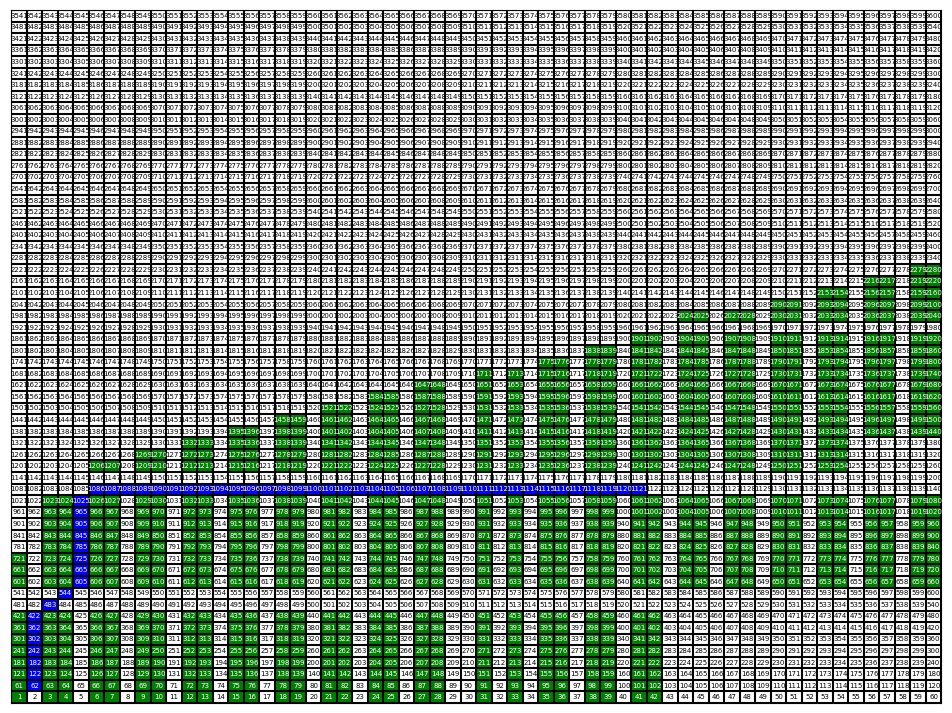

Route found: [(0, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 8), (3, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (5, 18), (6, 18), (7, 18), (8, 18), (9, 18), (10, 18), (11, 18), (12, 18), (13, 18), (14, 18), (15, 18), (16, 18), (17, 18), (18, 18), (19, 18), (20, 18), (21, 18), (22, 18), (23, 18), (24, 18), (25, 18), (26, 18), (27, 18), (28, 18), (29, 18), (30, 18), (31, 18), (32, 18), (33, 18), (34, 18), (35, 18), (36, 18), (37, 18), (38, 18), (39, 18), (40, 18)]
Total distance: 55.071067811865476


In [7]:

## Defining the Plotting Function

def plot_grid(grid_size, cell_size, non_walkable_cells, path):
    """
    Plots the grid, non-walkable cells, and the path (if provided) using matplotlib.

    Parameters:
    - grid_size: Tuple representing the size of the grid (number of rows, number of columns).
    - cell_size: The size of each grid cell in units.
    - non_walkable_cells: List of non-walkable cells as tuples (row, column).
    - path: List of cells representing the path as tuples (row, column).
    """
    num_rows = grid_size[0]
    num_cols = grid_size[1]

    fig, ax = plt.subplots(figsize=(12, 9))

    ax.set_xlim(0, num_cols * cell_size)
    ax.set_ylim(0, num_rows * cell_size)

    ax.set_xticks(range(0, num_cols * cell_size, cell_size))
    ax.set_yticks(range(0, num_rows * cell_size, cell_size))
    ax.set_xticklabels(range(1, num_cols + 1))
    ax.set_yticklabels(range(1, num_rows + 1))

    for i in range(num_cols + 1):
        ax.axvline(i * cell_size, color='black')
    for i in range(num_rows + 1):
        ax.axhline(i * cell_size, color='black')

    for i in range(num_rows):
        for j in range(num_cols):
            cell_coord = (i, j)
            if cell_coord in non_walkable_cells:
                ax.add_patch(Rectangle((i * cell_size, j * cell_size), cell_size, cell_size, facecolor='green'))
                ax.text((i + 0.5) * cell_size, (j + 0.5) * cell_size, str((j * num_cols) + i + 1),
                        ha='center', va='center', fontsize=5, color='white')
            elif path and cell_coord in path:
                ax.add_patch(Rectangle((i * cell_size, j * cell_size), cell_size, cell_size, facecolor='blue'))
                ax.text((i + 0.5) * cell_size, (j + 0.5) * cell_size, str((j * num_cols) + i + 1),
                        ha='center', va='center', fontsize=5, color='white')
            else:
                ax.text((i + 0.5) * cell_size, (j + 0.5) * cell_size, str((j * num_cols) + i + 1),
                        ha='center', va='center', fontsize=5)

    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

## A* Pathfinding Algorithm Functions

def heuristic(a, b):
    """
    Calculates the Manhattan distance heuristic between two cells.

    Parameters:
    - a: Tuple representing the coordinates of the first cell.
    - b: Tuple representing the coordinates of the second cell.

    Returns:
    - The Manhattan distance between the two cells.
    """
    return abs(b[0] - a[0]) + abs(b[1] - a[1])

def get_neighbors(current, grid_size, non_walkable_cells):
    """
    Returns a list of neighboring cells that can be visited from the current cell.

    Parameters:
    - current: Tuple representing the coordinates of the current cell.
    - grid_size: Tuple representing the size of the grid (number of rows, number of columns).
    - non_walkable_cells: List of non-walkable cells as tuples (row, column).

    Returns:
    - List of neighboring cells that can be visited from the current cell.
    """
    num_rows, num_cols = grid_size
    neighbors = []
    possible_moves = [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    for move in possible_moves:
        new_row = current[0] + move[0]
        new_col = current[1] + move[1]
        new_cell = (new_row, new_col)
        if (0 <= new_row < num_rows) and (0 <= new_col < num_cols) and (new_cell not in non_walkable_cells):
            neighbors.append(new_cell)

    return neighbors

def astar(start, goal, grid_size, non_walkable_cells):
    """
    A* pathfinding algorithm to find the shortest path from the start cell to the goal cell.

    Parameters:
    - start: Tuple representing the coordinates of the start cell.
    - goal: Tuple representing the coordinates of the goal cell.
    - grid_size: Tuple representing the size of the grid (number of rows, number of columns).
    - non_walkable_cells: List of non-walkable cells as tuples (row, column).

    Returns:
    - List of cells representing the shortest path from the start cell to the goal cell.
      If no path is found, returns None.
    """
    if goal in non_walkable_cells:
        closest_cell = find_closest_cell(goal, non_walkable_cells)
        if closest_cell is None:
            return None
        goal = closest_cell

    open_list = []
    heapq.heappush(open_list, (0, start))

    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    came_from = {}

    while open_list:
        current = heapq.heappop(open_list)[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for neighbor in get_neighbors(current, grid_size, non_walkable_cells):
            tentative_g_score = g_score[current] + 1

            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                came_from[neighbor] = current
                heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None



def calculate_total_distance(path, grid_size, cell_size):
    """
    Calculates the total distance of a given path.

    Parameters:
    - path: List of cells representing the path as tuples (row, column).
    - grid_size: Tuple representing the size of the grid (number of rows, number of columns).
    - cell_size: The size of each grid cell in units.

    Returns:
    - The total distance of the path.
    """
    total_distance = 0
    for i in range(len(path) - 1):
        start_cell = path[i]
        end_cell = path[i + 1]
        start_coord = cell_to_coordinate(start_cell, grid_size[1])
        end_coord = cell_to_coordinate(end_cell, grid_size[1])
        distance = math.sqrt((end_coord[0] - start_coord[0]) ** 2 + (end_coord[1] - start_coord[1]) ** 2)
        total_distance += distance
    return total_distance

def cell_to_coordinate(cell, num_cols):
    """
    Converts a cell coordinate to its corresponding (x, y) coordinate.

    Parameters:
    - cell: Tuple representing the coordinates of the cell (row, column).
    - num_cols: The number of columns in the grid.

    Returns:
    - Tuple representing the (x, y) coordinate of the cell.
    """
    row, col = cell
    return col, row

def find_closest_cell(target_cell, non_walkable_cells):
    """
    Finds the closest cell to the target cell from a list of non-walkable cells.

    Parameters:
    - target_cell: Tuple representing the coordinates of the target cell.
    - non_walkable_cells: List of non-walkable cells as tuples (row, column).

    Returns:
    - The closest non-walkable cell to the target cell.
      If no non-walkable cell is found, returns None.
    """
    min_distance = float('inf')
    closest_cell = None

    for cell in non_walkable_cells:
        distance = heuristic(target_cell, cell)
        if distance < min_distance:
            min_distance = distance
            closest_cell = cell

    return closest_cell


## Example Usage

# Set the grid size and cell size
grid_size = (60, 60)
cell_size = 1

# Set the start and target cells
start_cell = (0, 0)
target_cell = (40, 18)

# Define a function to read non-walkable cells from a CSV file
def read_non_walkable_cells_from_csv(file_path):
    non_walkable_cells = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the first row (header)
        for row in reader:
            cell_coord = (int(row[1]), int(row[2]))
            non_walkable_cells.append(cell_coord)
    return non_walkable_cells

# Set the path to the CSV file containing non-walkable cells
csv_file_path = 'Racks_cells.csv'

# Read the non-walkable cells from the CSV file
non_walkable_cells = read_non_walkable_cells_from_csv(csv_file_path)

# Find the shortest path using A* algorithm
route = astar(start_cell, target_cell, grid_size, non_walkable_cells)

# Plot the grid with non-walkable cells and the path
plot_grid(grid_size, cell_size, non_walkable_cells, route)

# Print the results
if route:
    print("Route found:", route)
    total_distance = calculate_total_distance(route, grid_size, cell_size)
    print("Total distance:", total_distance)
else:
    print("No route found.")
